### Marvel vs DC

[Marvel vs. DC IMDB Dataset](https://www.kaggle.com/hetulmehta/marvel-vs-dc-imdb-dataset), which includes IMDB ratings, Metascore ratings, and $ Growth in US from Films.

Using **IMDB Ratings** to compare success of **Films** and **TV Series** because often those are the subject of debate when comparing franchises.
Using **US Growth in $$$** to compare success of **Films** because it is a more accurate reflection of general opinion rather than those of critics.

**Data Dictionary**


*   Index
*   Movie: Title
*   Movie_Name: *Added, Title without a space
*   Year: Year of Release
*   Genre: Genre
*   RunTime: Running Time
*   Type: *Added, Film vs. TV Series, etc.
*   Rating: Certificate or Rating
*   Director: Director
*   Actor: Actors and Actresses
*   Description: Plot
*   IMDB_Score: IMDB Score
*   Metascore: Metascore
*   Votes: Number of votes in IMDB
*   USA_Gross: Gross collection in USA
*   Category: Marvel or DC



In [ ]:
import pandas as pd
import numpy as mp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print('import successful')

import successful


**Cleaning Steps**


*   Using Excel, added 'Type' Column.
*   'Movies' had some cells with spaces in front, so added 'Movies_Name' where that was corrected.




In [ ]:
# import file

df = pd.read_excel('RAW_PYTH622.xlsx')
df

In [ ]:
# Find and remove NaN IMDB_scores
IMDB_df = df.dropna(subset=['IMDB_Score'])

In [ ]:
# Find and remove NaN USA_Gross

USA_Gross = df.dropna(subset=['USA_Gross'])

In [ ]:
# Convert USA_Gross from object to float;   remove  $ and M
# Ex:  $12.4M ->  12.4

def convert_to_min(input_str):
  return float(input_str[1:-1])


USA_Gross['USA_Gross_num'] = USA_Gross['USA_Gross'].map(convert_to_min, na_action='ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
USA_Gross.dtypes

Index              int64
Movie             object
Movie_Name        object
Year              object
Genre             object
RunTime           object
Type              object
Rating            object
Director          object
Actor             object
Description       object
IMDB_Score       float64
Metascore        float64
Votes            float64
USA_Gross         object
Category          object
USA_Gross_num    float64
dtype: object

In [ ]:
USA_Gross

,Index,Movie,Movie_Name,Year,Genre,RunTime,Type,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category,USA_Gross_num
6,6,Avengers: Endgame,Avengers: Endgame,-2019,"Action,Adventure,Drama",181 min,Film,PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",After the devastating events of Avengers: Infi...,8.4,78.0,880911.0,$858.37M,Marvel,858.37
7,7,Guardians of the Galaxy,Guardians of the Galaxy,-2014,"Action,Adventure,Comedy",121 min,Film,PG-13,JamesGunn,"ChrisPratt,VinDiesel,BradleyCooper,ZoeSaldana",A group of intergalactic criminals must pull t...,8.0,76.0,1066222.0,$333.18M,Marvel,333.18
9,9,Spider-Man: Far from Home,Spider-Man: Far from Home,-2019,"Action,Adventure,Sci-Fi",129 min,Film,PG-13,JonWatts,"TomHolland,SamuelL.Jackson,JakeGyllenhaal,Mari...",Following the events of Avengers: Endgame (201...,7.5,69.0,348047.0,$390.53M,Marvel,390.53
10,10,Thor: Ragnarok,Thor: Ragnarok,-2017,"Action,Adventure,Comedy",130 min,Film,PG-13,TaikaWaititi,"ChrisHemsworth,TomHiddleston,CateBlanchett,Mar...","Imprisoned on the planet Sakaar, Thor must rac...",7.9,74.0,615860.0,$315.06M,Marvel,315.06
11,11,Avengers: Infinity War,Avengers: Infinity War,-2018,"Action,Adventure,Sci-Fi",149 min,Film,PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisHemsworth,MarkRuffalo,Chr...",The Avengers and their allies must be willing ...,8.4,68.0,881638.0,$678.82M,Marvel,678.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,444,Agent Cody Banks,Agent Cody Banks,-2003,"Action,Adventure,Comedy",102 min,Film,PG,HaraldZwart,"FrankieMuniz,HilaryDuff,AndrewFrancis,AngieHarmon",A government agent trains Cody Banks in the wa...,5.1,41.0,33401.0,$47.81M,DC,47.81
440,448,Looney Tunes: Back in Action,Looney Tunes: Back in Action,-2003,"Animation,Action,Adventure",91 min,Film,PG,"JoeDante,EricGoldberg","BrendanFraser,JennaElfman,SteveMartin,HeatherL...",The Looney Tunes search for a man's missing fa...,5.7,64.0,34009.0,$20.99M,DC,20.99
445,453,Fred Claus,Fred Claus,-2007,"Comedy,Family,Fantasy",116 min,Film,PG,DavidDobkin,"VinceVaughn,PaulGiamatti,ElizabethBanks,JohnMi...","Fred Claus, Santa's bitter older brother, is f...",5.6,42.0,40992.0,$72.01M,DC,72.01
463,471,Being Flynn,Being Flynn,-2012,Drama,102 min,Film,R,PaulWeitz,"PaulDano,RobertDeNiro,JulianneMoore,OliviaThirlby","Working in a Boston homeless shelter, Nick Fly...",6.4,53.0,16695.0,$0.53M,DC,0.53


*   Removed null values in 'IMDB_Scores' and 'USA_Gross' columns
*   Changed 'USA_Gross' type from object to float

*   Note: I would have liked to analyze media by year, but I would be limited to analysis of Films only. Series (Web series, TV series, etc) are longer than others and the quality varies by season so much for just one series (think about comparing shows like Doom Patrol and Batman). Also, the formatting for years was variable here and cleaning would have been difficult. So that's something to look into for further analysis should someone want to.

## DC Analysis

In [ ]:
#  compare AVG imdb score by 'Type' & 'Category'

DC_df = df[df['Category'] == 'DC']
DC_df

,Index,Movie,Movie_Name,Year,Genre,RunTime,Type,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
382,389,Wonder Woman 1984,Wonder Woman 1984,-2020,"Action,Adventure,Fantasy",151 min,Film,PG-13,PattyJenkins,"GalGadot,ChrisPine,KristenWiig,PedroPascal",Diana must contend with a work colleague and b...,5.4,60.0,207191.0,$46.37M,DC
383,390,The Suicide Squad,The Suicide Squad,-2021,"Action,Adventure,Comedy",NaN,Film,R,JamesGunn,"MargotRobbie,IdrisElba,JohnCena,TaikaWaititi","Supervillains Harley Quinn, Bloodsport, Peacem...",NaN,NaN,NaN,NaN,DC
384,391,The Batman,The Batman,-2022,"Action,Crime,Drama",NaN,Film,NaN,MattReeves,"BarryKeoghan,RobertPattinson,ColinFarrell,Andy...",The plot is unknown.,NaN,NaN,NaN,NaN,DC
385,392,Joker,Joker,-2019,"Crime,Drama,Thriller",122 min,Film,R,ToddPhillips,"JoaquinPhoenix,RobertDeNiro,ZazieBeetz,Frances...","In Gotham City, mentally troubled comedian Art...",8.4,59.0,1004600.0,$335.45M,DC
386,393,Arrow,Arrow,(2012â€“2020),"Action,Adventure,Crime",42 min,TV Series,TV-14,NaN,"StephenAmell,KatieCassidy,DavidRamsey,SusannaT...",Spoiled billionaire playboy Oliver Queen is mi...,7.5,NaN,411938.0,NaN,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,1685,DC's Legends of Tomorrow,DC's Legends of Tomorrow,(2016â€“ ),"Action,Adventure,Drama",42 min,TV Series,TV-14,GregorySmith,"BrandonRouth,CaityLotz,MaisieRichardson-Seller...","Worlds lived, worlds died. Nothing will ever b...",8.5,NaN,2050.0,NaN,DC
1675,1686,Supergirl,Supergirl,(2015â€“2021),"Action,Adventure,Drama",42 min,TV Series,TV-PG,CarlSeaton,"MelissaBenoist,MehcadBrooks,ChylerLeigh,KatieM...","In the wake of Lex Luthor's return, the show f...",8.3,NaN,1259.0,NaN,DC
1676,1687,Supergirl,Supergirl,(2015â€“2021),"Action,Adventure,Drama",42 min,TV Series,TV-PG,AlexisOstrander,"MelissaBenoist,MehcadBrooks,ChylerLeigh,KatieM...",Kara comes face to face with Red Daughter and ...,8.1,NaN,1053.0,NaN,DC
1677,1688,Supergirl,Supergirl,(2015â€“2021),"Action,Adventure,Drama",42 min,TV Series,TV-PG,ShannonKohli,"MelissaBenoist,MehcadBrooks,ChylerLeigh,KatieM...",Kara and Lena head to Kaznia to hunt down Lex....,7.4,NaN,1036.0,NaN,DC


Text(0.5, 1.0, 'IMDB Score by Type of DC Media')

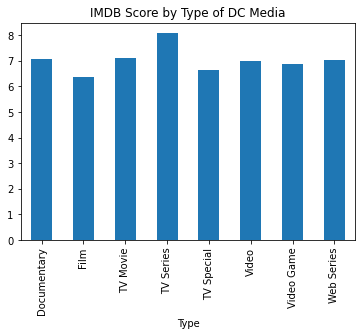

In [ ]:
# Plot an average of IMDB_scores per Type in a bar chart
DC_df.groupby('Type')['IMDB_Score'].mean().plot(kind='bar')
#X axis = Type
#Y axis = IMDB_Score

# Add title
plt.title('IMDB Score by Type of DC Media')

## Marvel Analysis

In [ ]:
#  compare AVG imdb score by 'Type' & 'Category'

Marvel_df = df[df['Category'] == 'Marvel']
Marvel_df

Text(0.5, 1.0, 'IMDB Score by Type of Marvel Media')

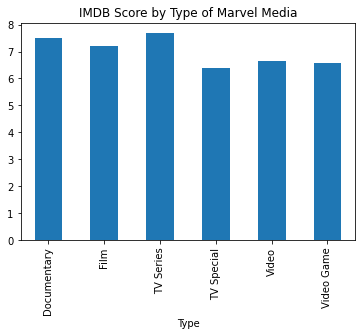

In [ ]:
# Plot an average of IMDB_scores per Type in a bar chart
Marvel_df.groupby('Type')['IMDB_Score'].mean().plot(kind='bar')
#X axis = Type
#Y axis = IMDB_Score

# Add title
plt.title('IMDB Score by Type of Marvel Media')

## DC vs. Marvel

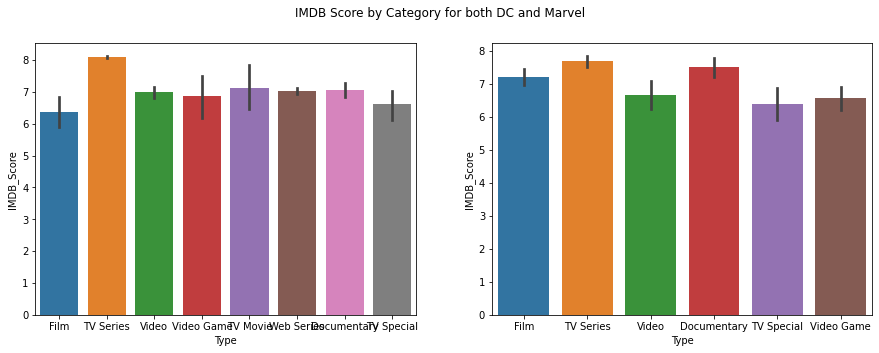

In [ ]:
# Create a 1x2 grid and unpack the axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Add a figure-level title
fig.suptitle('IMDB Score by Category for both DC and Marvel')

# On ax1, create a bar graph for DC
sns.barplot(x='Type', y='IMDB_Score', data=DC_df, ax=ax1)

# On ax2, create a bar graph for Marvel
sns.barplot(x='Type', y='IMDB_Score', data=Marvel_df, ax=ax2)

plt.show(sns)

# Comparing DC vs. Marvel TV Series

In [ ]:
# Pulling Type == TV Series 
Compare_TVSeries = df[df['Type'] == 'TV Series']
Compare_TVSeries

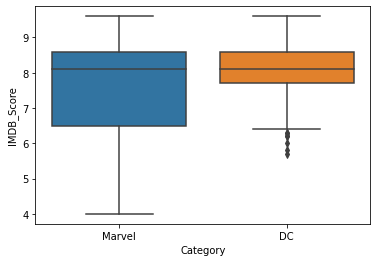

In [ ]:
sns.boxplot(x='Category', y='IMDB_Score', data=Compare_TVSeries)

# Comparing DC vs. Marvel Films

In [ ]:
# Pulling Type == Film 
Compare_Films = df[df['Type'] == 'Film']
Compare_Films

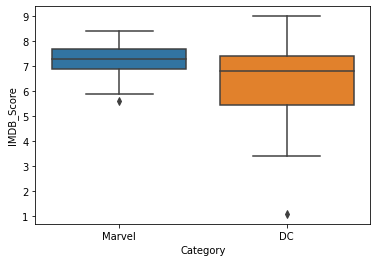

In [ ]:
sns.boxplot(x='Category', y='IMDB_Score', data=Compare_Films)

# Comparing DC vs. Marvel $$$ (Film only)

In [ ]:
Compare_Films = USA_Gross[USA_Gross['Type'] == 'Film']
Compare_Films

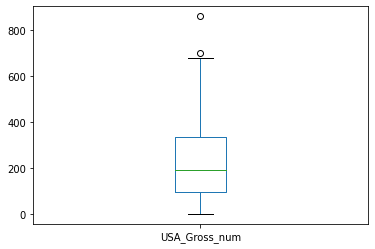

In [ ]:
Compare_Films['USA_Gross_num'].plot(kind='box')

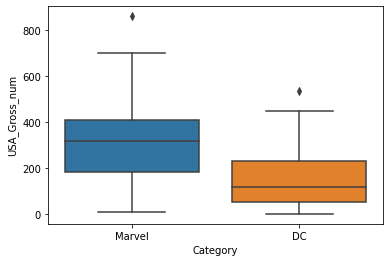

In [ ]:
sns.boxplot(x='Category', y='USA_Gross_num', data=Compare_Films)